# Simplified synthetic data generating process

In [1]:
import sys

sys.path.append("../")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from utils.synthetic_utils import *

In [3]:
# Read the observational data
lalonde_psid = pd.read_csv("../data/lalonde_psid.csv")
lalonde_psid = lalonde_psid[lalonde_psid["treat"] == 0]

In [4]:
re_vars = ["age", "education", "re74", "re75", "re78"]
group_vars = ["black", "hispanic"]
group_stats = compute_group_stats(lalonde_psid, group_vars, re_vars)

proportions = lalonde_psid[["black", "hispanic"]].mean()
prob_black = proportions["black"]
prob_hispanic = proportions["hispanic"]
prob_white = 1 - prob_black - prob_hispanic

In [5]:
for n in [1000, 10000, 100000]:
    synthetic_data = generate_synthetic_data(
        n, prob_black, prob_hispanic, prob_white, group_stats
    )

    display(synthetic_data.describe())
    synthetic_data.to_csv(f"../output/synthetic_{n}.csv", index=False)

,black,hispanic,married,education,treat,age,re74,re75,re78
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.24900,0.041000,0.822000,11.842000,0.476000,35.415000,19134.475209,19201.548773,23926.792441
std,0.43265,0.198389,0.382704,3.152931,0.499674,10.062506,12569.273111,12609.535988,14754.374938
min,0.00000,0.000000,0.000000,2.000000,0.000000,16.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,1.000000,10.000000,0.000000,28.000000,9420.976350,10095.485110,11921.033992
50%,0.00000,0.000000,1.000000,12.000000,0.000000,35.000000,18287.473282,18331.813382,22800.147537
75%,0.00000,0.000000,1.000000,14.000000,1.000000,42.000000,27455.704934,27210.218200,33605.238293
max,1.00000,1.000000,1.000000,23.000000,1.000000,70.000000,72127.870275,69846.196510,70024.595932


,black,hispanic,married,education,treat,age,re74,re75,re78
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.248600,0.031700,0.841200,12.051400,0.451800,35.565000,20085.974837,19809.559405,24598.922493
std,0.432223,0.175209,0.365508,3.102728,0.497696,9.707997,12808.030565,12933.487712,14980.187188
min,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,10.000000,0.000000,28.000000,10637.772837,10082.743849,13187.540002
50%,0.000000,0.000000,1.000000,12.000000,0.000000,35.000000,18967.117741,18704.468429,23668.911725
75%,0.000000,0.000000,1.000000,14.000000,1.000000,42.000000,28387.590782,28124.209170,34585.200083
max,1.000000,1.000000,1.000000,22.000000,1.000000,80.000000,75668.855288,76023.308438,87941.236258


,black,hispanic,married,education,treat,age,re74,re75,re78
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.249550,0.03229,0.844210,12.056950,0.459150,35.577860,19987.694528,19584.994674,24387.783989
std,0.432755,0.17677,0.362658,3.099642,0.498331,9.669546,12710.332639,12818.415965,14881.911771
min,0.000000,0.00000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,1.000000,10.000000,0.000000,29.000000,10542.478363,9949.786522,13174.213269
50%,0.000000,0.00000,1.000000,12.000000,0.000000,35.000000,19002.772383,18538.159591,23468.773806
75%,0.000000,0.00000,1.000000,14.000000,1.000000,42.000000,28307.110894,27953.928217,34261.929997
max,1.000000,1.00000,1.000000,26.000000,1.000000,81.000000,84453.211089,89252.800039,91212.663620


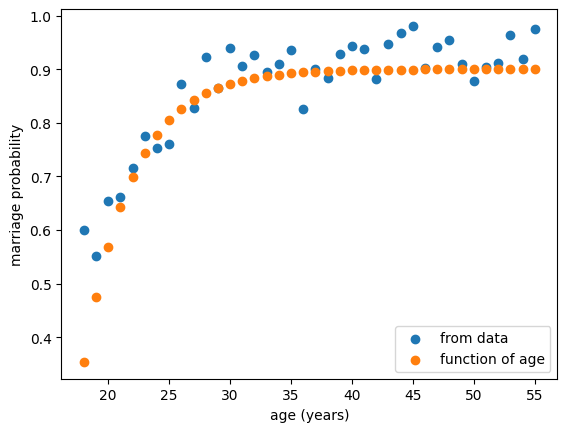

In [6]:
adf = lalonde_psid.groupby("age")[["married"]].mean().reset_index()
plt.scatter(adf["age"], adf["married"], label="from data")
plt.scatter(adf["age"], marriage_prob(adf["age"]), label="function of age")
plt.legend()
plt.xlabel("age (years)")
plt.ylabel("marriage probability")
plt.show()

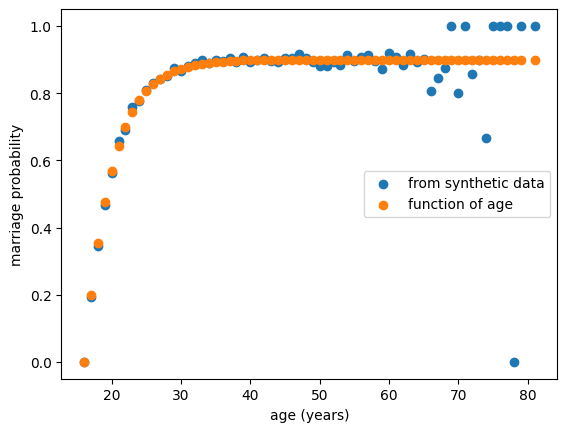

In [7]:
adf = synthetic_data.groupby("age")[["married"]].mean().reset_index()
plt.scatter(adf["age"], adf["married"], label="from synthetic data")
plt.scatter(adf["age"], marriage_prob(adf["age"]), label="function of age")
plt.legend()
plt.xlabel("age (years)")
plt.ylabel("marriage probability")
plt.show()